In [2]:
# K MEANS CLUSTERING
import pandas as pd
#To take and create dataframe
df = pd.read_csv('house_price.csv')
df

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000


In [3]:
df.info


<bound method DataFrame.info of          Location  BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0    Bommanahalli    3           1   3000           1      3  28000
1    Bommanahalli    3           1   1650          10      0  18000
2      Whitefield    2           0   1000           5      3  16400
3      Whitefield    3           0   1600           1      9  27000
4      Whitefield    2           1   1200           5      1  20000
..            ...  ...         ...    ...         ...    ...    ...
995  Bommanahalli    3           1   1460           1      2  25000
996    Whitefield    3           0   2100           1      7  28000
997  Bommanahalli    2           0   1033           5      0  16500
998  Bommanahalli    3           0   1500          10      1  22000
999    Whitefield    3           1   1768           5     11  30000

[1000 rows x 7 columns]>

In [4]:
df.shape
#rows,columns

(1000, 7)

In [18]:
y= df.iloc[:,3:5].values
y

array([[3000,    1],
       [1650,   10],
       [1000,    5],
       ...,
       [1033,    5],
       [1500,   10],
       [1768,    5]])

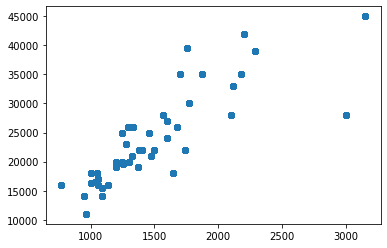

In [9]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df['Sq.ft'],df['Price'])

In [48]:
import numpy as np
np.sqrt(1000)

31.622776601683793

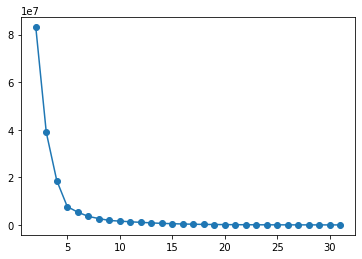

In [49]:
#DELBOW METHOd
from sklearn.cluster import KMeans
k = range(2,32)

sse = [] 
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(y)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters ,Score = 0.6843832383333859
3 Clusters ,Score = 0.6487757150702932
4 Clusters ,Score = 0.6179086477188934
5 Clusters ,Score = 0.6745090243383134
6 Clusters ,Score = 0.6606348424821517
7 Clusters ,Score = 0.6812680477758095
8 Clusters ,Score = 0.688238391648401
9 Clusters ,Score = 0.6958579965146996
10 Clusters ,Score = 0.6828483930853785
11 Clusters ,Score = 0.6541168646153446
12 Clusters ,Score = 0.6562667263376686
13 Clusters ,Score = 0.6929887950316206
14 Clusters ,Score = 0.7098870523083451
15 Clusters ,Score = 0.7305594911491408
16 Clusters ,Score = 0.7511810352520589
17 Clusters ,Score = 0.7472488841209634
18 Clusters ,Score = 0.7635040753228173
19 Clusters ,Score = 0.8000416538185474
20 Clusters ,Score = 0.8203757678855969
21 Clusters ,Score = 0.8459106893201249
22 Clusters ,Score = 0.8523549770826594
23 Clusters ,Score = 0.854714402705682
24 Clusters ,Score = 0.8630593635178538
25 Clusters ,Score = 0.8794139946400195
26 Clusters ,Score = 0.8941198034674106
27 Cluster

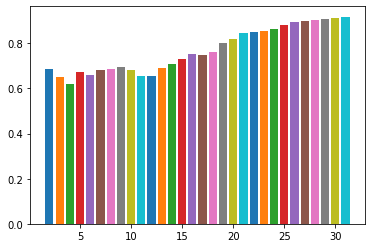

In [50]:
#SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,32)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(y)
  y_pred = model_demo.predict(y)
  print(f"{i} Clusters ,Score = {silhouette_score(y,y_pred)}")
  plt.bar(i,silhouette_score(y,y_pred))


In [51]:
#applying cluster
k = 4
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(y)

KMeans(n_clusters=4, random_state=0)

In [52]:
z = model.predict(y)
z

array([2, 3, 0, 3, 0, 3, 1, 1, 1, 3, 0, 0, 0, 3, 0, 0, 2, 2, 0, 2, 3, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 3, 3, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 1, 3, 0, 3, 0, 0, 3, 3, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 3, 0, 3, 0, 2, 3, 0, 3, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 2, 0, 3, 3, 0, 3, 1, 3, 0, 0, 0,
       1, 0, 3, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 1, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1, 3,
       3, 3, 3, 0, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 0, 3, 2, 0,
       1, 0, 1, 0, 3, 3, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 3, 1, 1, 0, 3, 3, 3, 3, 0, 1, 0, 0, 1,

In [53]:
y[z == 1,1]

array([10,  1,  1,  5,  1,  1,  1,  5,  1,  1,  5,  1,  1,  1,  1,  1,  5,
        1,  1,  1,  1,  1, 10,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1, 10,
        1,  1,  5,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1, 10, 10,  1,  1,
        1,  1,  1,  1,  1,  1, 10, 10,  1,  1,  5,  5,  1,  1, 10,  1,  5,
       10, 10, 10,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  5,  5,  1,  5, 10,  1, 10,  1,  5,  1,  5,  1,  1, 10,  1,  1,
        1, 10,  1,  5,  1,  1,  1,  1, 10,  5,  1,  5,  1, 10,  1,  1,  1])

In [54]:
np.unique(z,return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([555, 119,  40, 286]))

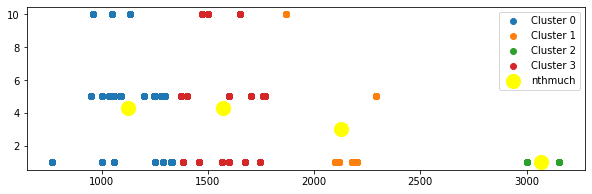

In [55]:
#final visualisation
plt.figure(figsize = (10,3))
for i in range(k):
  plt.scatter(y[z == i,0],y[z == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 200,c = 'yellow',
            label = 'nthmuch')
plt.legend()